In [ ]:

import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow


In [ ]:

from google.colab import drive
drive.mount("/Pandas")


Drive already mounted at /Pandas; to attempt to forcibly remount, call drive.mount("/Pandas", force_remount=True).


In [ ]:

!pip install ultralytics


In [ ]:


from ultralytics import YOLO
# model =YOLO('/Pandas/MyDrive/football_detection/best.pt')
# model =YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x-pose-p6.pt')
model =YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x.pt')



Found https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x.pt locally at yolov8x.pt



image 1/1 /Pandas/MyDrive/football_detection/single.jpg: 448x640 1 sports ball, 110.5ms
Speed: 3.5ms preprocess, 110.5ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


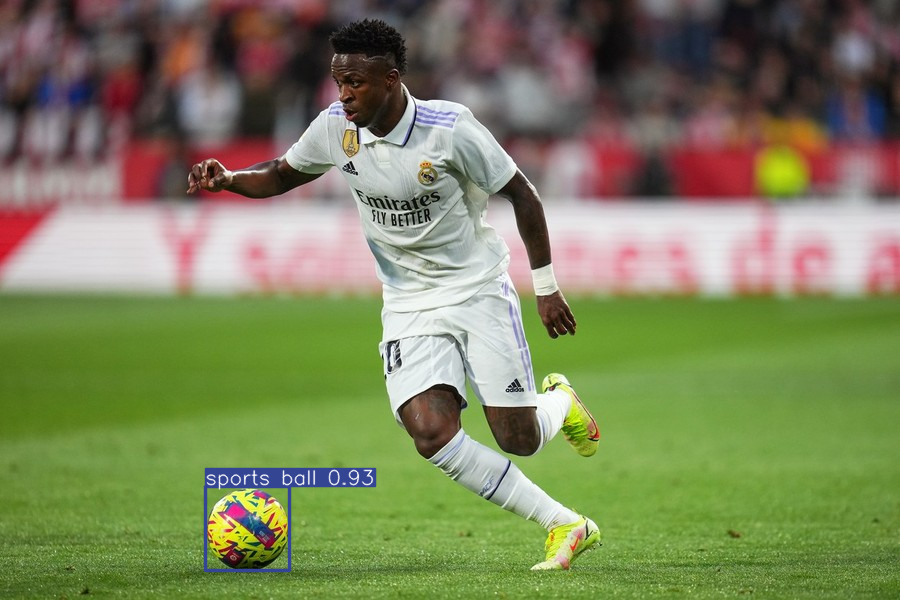

In [ ]:

path="/Pandas/MyDrive/football_detection/single.jpg"
r=model.predict(path, classes=32.0,save=False, conf=0.50)
a_f=r[0].plot()
# r=model(results)
cv2_imshow(a_f)


In [ ]:

results=model.predict(path,classes=32.0, save=False, conf=0.50)
# Extract bounding boxes, classes, names, and confidences
boxes = results[0].boxes.xyxy.tolist()
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()



image 1/1 /Pandas/MyDrive/football_detection/single.jpg: 448x640 1 sports ball, 49.0ms
Speed: 3.2ms preprocess, 49.0ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:

# Iterate through the results
for box, cls, conf in zip(boxes, classes, confidences):
    x1, y1, x2, y2 = box
    confidence = conf
    detected_class = cls
    name = names[int(cls)]
    print("x1, y1, x2, y2 : ",x1, y1, x2, y2)
    print("confidence : ",confidence)
    print("detected_class : ",detected_class)
    print("name : ",name)
    if(detected_class==32.0):
      print(" It's football########################### : ",x1, y1, x2, y2)


x1, y1, x2, y2 :  205.0293426513672 486.7865905761719 289.9071960449219 570.7606201171875
confidence :  0.929997980594635
detected_class :  32.0
name :  sports ball
 It's football########################### :  205.0293426513672 486.7865905761719 289.9071960449219 570.7606201171875


In [ ]:
type(x1)

float

# create pandas dataframe

In [ ]:

def calculate_center(x1, y1, x2, y2):
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    return (int(center_x), int(center_y))
calculate_center(x1, y1, x2, y2)

(247, 528)

In [ ]:

bbox_c=calculate_center(x1, y1, x2, y2)

data={'bbox':[(int(x1), int(y1), int(x2), int(y2))],
      'bbox_center':bbox_c,
      'class_name':['football']}
data

{'bbox': [(205, 486, 289, 570)],
 'bbox_center': [(247, 528)],
 'class_name': ['football']}

In [ ]:

# Creating a Pandas DataFrame
df = pd.DataFrame(data, index=['frame_1'])
df

,bbox,bbox_center,class_name
frame_1,"(205, 486, 289, 570)","(247, 528)",football


In [ ]:
df.loc['frame_2'] = [(203,485,290,572),(248,530),'football']
df

,bbox,bbox_center,class_name
frame_1,"(205, 486, 289, 570)","(247, 528)",football
frame_2,"(203, 485, 290, 572)","(248, 530)",football


# Video to Frame

In [ ]:
def extract_bbox(image):
  results=model.predict(image,classes=32.0, save=False, conf=0.50)
  # Extract bounding boxes, classes, names, and confidences
  boxes = results[0].boxes.xyxy.tolist()
  return boxes

In [ ]:
video_path = "/Pandas/MyDrive/football_detection/ball.mp4"
cap = cv2.VideoCapture(video_path)
total_frames = (cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("total_frames : ",total_frames)
success,image = cap.read()
# a=extract_bbox(image)
# a

total_frames :  848.0


In [ ]:
image1="/Pandas/MyDrive/football_detection/single.jpg"
a=extract_bbox(image1)
if(a!=''):
  x1,y1,x2,y2=a[0]
  print(x1,y1,x2,y2)
  b_c=calculate_center(x1,y1,x2,y2)
  df.loc['indx']=[(int(x1), int(y1), int(x2), int(y2)),b_c,'football' ]
  print(b_c)
df


image 1/1 /Pandas/MyDrive/football_detection/single.jpg: 448x640 1 sports ball, 71.4ms
Speed: 3.2ms preprocess, 71.4ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
205.0293426513672 486.7865905761719 289.9071960449219 570.7606201171875
(247, 528)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,bbox,bbox_center,class_name
indx,"(205, 486, 289, 570)","(247, 528)",football


In [ ]:
df = pd.DataFrame(columns=['bbox', 'bbox_center', 'class_name'])
df

,bbox,bbox_center,class_name


In [ ]:
df = pd.DataFrame(columns=['bbox', 'bbox_center', 'class_name'])
video_path = "/Pandas/MyDrive/football_detection/ball.mp4"
cap = cv2.VideoCapture(video_path)
total_frames = (cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("total_frames : ",total_frames)
success,image = cap.read()

c=0
b_name="Frame"
while(True):
  c=c+1
  success,image_ = cap.read()
  # cv2_imshow(image_)
  if success == False:
    break
  indx="Frame_"+str(c)
  a=extract_bbox(image_)
  # print(len(a))
  if(len(a)==0):
    df.loc[indx]=[None,None,None]
  else:
    print("$$$$$$$$$$$$$$$$$$$ ",a)
    x1,y1,x2,y2=a[0]
    # print(x1,y1,x2,y2)
    bbox_c=calculate_center(x1,y1,x2,y2)
    df.loc[indx]=[(int(x1), int(y1), int(x2), int(y2)),bbox_c,'football']



total_frames :  848.0

0: 384x640 (no detections), 63.9ms
Speed: 3.7ms preprocess, 63.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 64.3ms
Speed: 2.9ms preprocess, 64.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 63.6ms
Speed: 1.6ms preprocess, 63.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 45.0ms
Speed: 2.2ms preprocess, 45.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.9ms
Speed: 2.3ms preprocess, 40.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.0ms
Speed: 2.7ms preprocess, 39.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 38.1ms
Speed: 5.5ms preprocess, 38.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 33.7ms
Speed: 2.2m

In [ ]:
df

,bbox,bbox_center,class_name
Frame_1,None,None,None
Frame_2,None,None,None
Frame_3,None,None,None
Frame_4,None,None,None
Frame_5,None,None,None
...,...,...,...
Frame_843,None,None,None
Frame_844,None,None,None
Frame_845,None,None,None
Frame_846,None,None,None


In [ ]:

df.to_csv('Footbal_bbox.csv', encoding='utf-8')


In [ ]:
df

,bbox,bbox_center,class_name
Frame_1,None,None,None
Frame_2,None,None,None
Frame_3,None,None,None
Frame_4,None,None,None
Frame_5,None,None,None
...,...,...,...
Frame_843,None,None,None
Frame_844,None,None,None
Frame_845,None,None,None
Frame_846,None,None,None


In [ ]:
!yolo detect predict model=https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x.pt classes=32.0 conf=.5 source=/Pandas/MyDrive/football_detection/ball.mp4

Found https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8x.pt locally at yolov8x.pt
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs

video 1/1 (1/848) /Pandas/MyDrive/football_detection/ball.mp4: 384x640 (no detections), 144.1ms
video 1/1 (2/848) /Pandas/MyDrive/football_detection/ball.mp4: 384x640 (no detections), 48.2ms
video 1/1 (3/848) /Pandas/MyDrive/football_detection/ball.mp4: 384x640 (no detections), 48.1ms
video 1/1 (4/848) /Pandas/MyDrive/football_detection/ball.mp4: 384x640 (no detections), 48.1ms
video 1/1 (5/848) /Pandas/MyDrive/football_detection/ball.mp4: 384x640 (no detections), 43.1ms
video 1/1 (6/848) /Pandas/MyDrive/football_detection/ball.mp4: 384x640 (no detections), 37.4ms
video 1/1 (7/848) /Pandas/MyDrive/football_detection/ball.mp4: 384x640 (no detections), 36.4ms
video 1/1 (8/848) /Pandas/MyDrive/football_detection/ball.m